In [12]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

In [98]:
month_times = [
    -1,
    30.417,
    60.833,
    91.25,
    121.667,
    152.083,
    182.5,
    212.917,
    243.333,
    273.75,
    304.167,
    334.583,
    366
]

month_times_for_dtk = [
    0.0,
    30.417,
    60.833,
    91.25,
    121.667,
    152.083,
    182.5,
    212.917,
    243.333,
    273.75,
    304.167,
    334.583
]

In [13]:
import json

with open("VectorHabitatReport_Central.json","r") as f:
    d = json.load(f)

In [14]:
list(d["Channels"].keys())

['Artificial Larval Mortality',
 'Current Habitat Capacity',
 'Egg Crowding Factor',
 'Local Larval Growth Modifier',
 'Local Larval Mortality',
 'Rainfall Larval Mortality',
 'Total Larva']

In [15]:
d["Header"]

{'DateTime': 'Wed Apr 28 15:30:57 2021',
 'DTK_Version': '4900 Malaria-Ongoing (28dd5f8) Jul 16 2020 14:55:02',
 'Report_Version': '2.1',
 'Timesteps': 2555,
 'Subchannel_Metadata': {'AxisLabels': [['Species:Habitat']],
  'NumBinsPerAxis': [[5]],
  'ValuesPerAxis': [[[0, 0, 0, 0, 0]]],
  'MeaningPerAxis': [[['gambiae:TEMPORARY_RAINFALL',
     'gambiae:CONSTANT',
     'gambiae:LINEAR_SPLINE',
     'funestus:WATER_VEGETATION',
     'funestus:LINEAR_SPLINE']]]},
 'Channels': 7}

In [16]:
tr = np.array(d["Channels"]["Current Habitat Capacity"]["Data"][0])
c = np.array(d["Channels"]["Current Habitat Capacity"]["Data"][1])
wv = np.array(d["Channels"]["Current Habitat Capacity"]["Data"][3])

In [62]:
df = pd.DataFrame({
    "year": np.repeat(np.arange(6),365),
    "time": np.arange(2555-365),
    "gambiae": tr[365:],
    "funest": wv[365:]
})

df["day_of_year"] = df["time"]%365
df["month"] = pd.cut(df["day_of_year"], bins=month_times, labels=np.arange(1,13))

In [63]:
# Get year-normalized version:

df_list = []
for y,sdf in df.groupby("year"):
    sdf["gambiae_norm"] = sdf["gambiae"]/np.mean(sdf["gambiae"])
    sdf["funest_norm"] = sdf["funest"]/np.mean(sdf["funest"])
    df_list.append(sdf.copy())
    
df_with_norm = pd.concat(df_list)

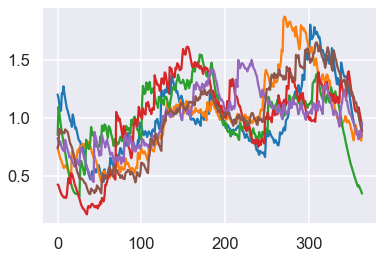

In [67]:
for y,sdf in df_with_norm.groupby("year"):
    plt.plot(sdf["day_of_year"], sdf["gambiae_norm"])

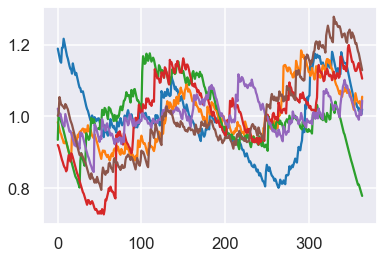

In [68]:
for y,sdf in df_with_norm.groupby("year"):
    plt.plot(sdf["day_of_year"], sdf["funest_norm"])

In [69]:
m = df_with_norm.groupby("month").agg("mean").reset_index()

(0.0, 1.0)

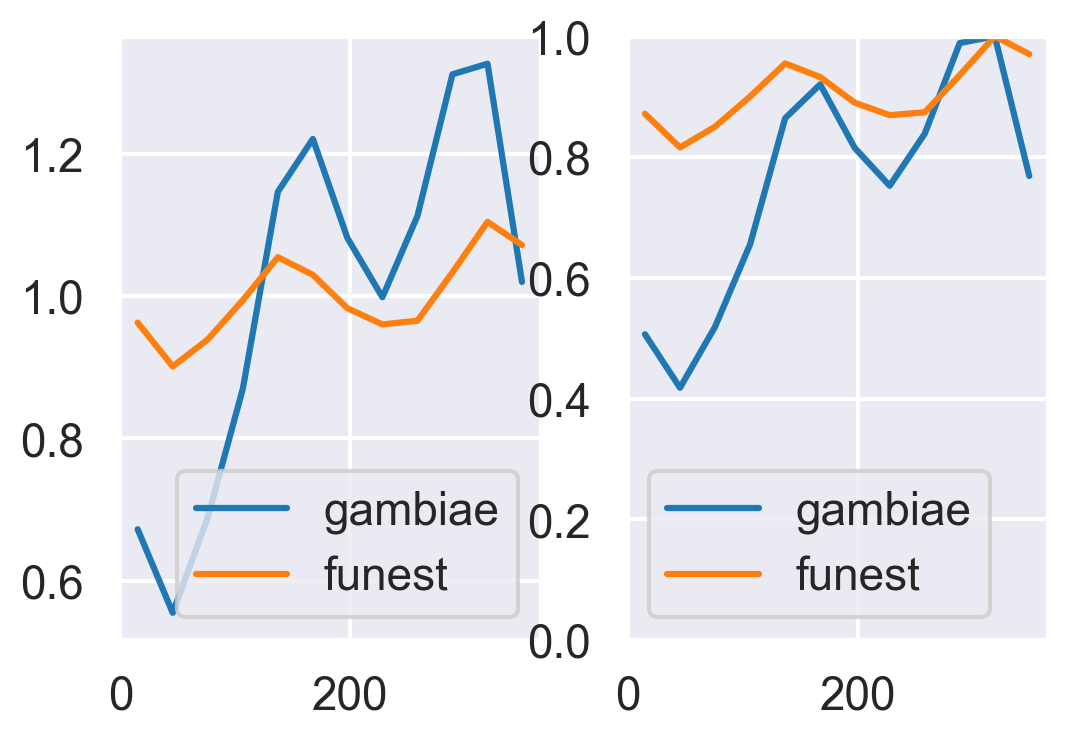

In [77]:
plt.figure(dpi=200)
plt.subplot(121)
plt.plot(m["day_of_year"], m["gambiae_norm"], label="gambiae")
plt.plot(m["day_of_year"], m["funest_norm"], label="funest")
plt.legend()

plt.subplot(122)
plt.plot(m["day_of_year"], m["gambiae_norm"]/np.max(m["gambiae_norm"]), label="gambiae")
plt.plot(m["day_of_year"], m["funest_norm"]/np.max(m["funest_norm"]), label="funest")
plt.legend()
plt.ylim([0,1])

In [79]:
g_spline = m["gambiae_norm"]/np.max(m["gambiae_norm"])
f_spline = m["funest_norm"]/np.max(m["funest_norm"])

In [95]:
# Set relative factor between funest and gambiae to get overall 5% of funest as gambiae:
relative_factor = 0.05/(np.sum(f_spline)/(np.sum(f_spline)+np.sum(g_spline)))
print(relative_factor)

0.09163586364859173


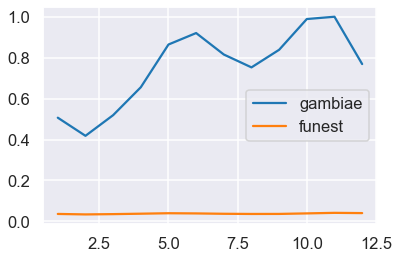

In [84]:
plt.plot(m["month"], g_spline, label="gambiae")
plt.plot(m["month"], f_spline*relative_factor, label="funest")
plt.legend()

In [86]:
save_df = pd.DataFrame({
    "archetype": "Central",
    "gambiae_spline": np.array(g_spline),
    "funest_spline": np.array(f_spline),
    "times": month_times_for_dtk
})

In [87]:
save_df

,archetype,gambiae_spline,funest_spline,times
0,Central,0.506629,0.871731,0.000
1,Central,0.418073,0.815891,30.417
2,Central,0.519043,0.850307,60.833
3,Central,0.655458,0.900257,91.250
4,Central,0.864254,0.954967,121.667
5,Central,0.920321,0.932547,152.083
6,Central,0.815437,0.890053,182.500
7,Central,0.752515,0.869448,212.917
8,Central,0.838585,0.874111,243.333
9,Central,0.988824,0.935670,273.750


In [88]:
save_df.to_csv("central_ento_splines.csv", index=False)

In [91]:
list(np.round(save_df["gambiae_spline"],2))

[0.51, 0.42, 0.52, 0.66, 0.86, 0.92, 0.82, 0.75, 0.84, 0.99, 1.0, 0.77]

In [92]:
list(np.round(save_df["funest_spline"],2))

[0.87, 0.82, 0.85, 0.9, 0.95, 0.93, 0.89, 0.87, 0.87, 0.94, 1.0, 0.97]

In [96]:
np.log10(relative_factor)

-1.0379345226595817

# Eastern

In [99]:
import json

with open("VectorHabitatReport_Eastern.json","r") as f:
    d = json.load(f)

In [100]:
list(d["Channels"].keys())

['Artificial Larval Mortality',
 'Current Habitat Capacity',
 'Egg Crowding Factor',
 'Local Larval Growth Modifier',
 'Local Larval Mortality',
 'Rainfall Larval Mortality',
 'Total Larva']

In [101]:
d["Header"]

{'DateTime': 'Thu Apr 29 15:02:19 2021',
 'DTK_Version': '4900 Malaria-Ongoing (28dd5f8) Jul 16 2020 14:55:02',
 'Report_Version': '2.1',
 'Timesteps': 2555,
 'Subchannel_Metadata': {'AxisLabels': [['Species:Habitat']],
  'NumBinsPerAxis': [[8]],
  'ValuesPerAxis': [[[0, 0, 0, 0, 0, 0, 0, 0]]],
  'MeaningPerAxis': [[['gambiae:TEMPORARY_RAINFALL',
     'gambiae:CONSTANT',
     'gambiae:LINEAR_SPLINE',
     'funestus:WATER_VEGETATION',
     'funestus:LINEAR_SPLINE',
     'arabiensis:TEMPORARY_RAINFALL',
     'arabiensis:CONSTANT',
     'arabiensis:LINEAR_SPLINE']]]},
 'Channels': 7}

In [102]:
tr = np.array(d["Channels"]["Current Habitat Capacity"]["Data"][0])
c = np.array(d["Channels"]["Current Habitat Capacity"]["Data"][1])
wv = np.array(d["Channels"]["Current Habitat Capacity"]["Data"][3])

In [125]:
df = pd.DataFrame({
    "year": np.repeat(np.arange(6),365),
    "time": np.arange(2555-365),
    "gambiae": tr[365:], #+c[365:],
    "funest": wv[365:]
})

df["day_of_year"] = df["time"]%365
df["month"] = pd.cut(df["day_of_year"], bins=month_times, labels=np.arange(1,13))

In [126]:
# Get year-normalized version:

df_list = []
for y,sdf in df.groupby("year"):
    sdf["gambiae_norm"] = sdf["gambiae"]/np.mean(sdf["gambiae"])
    sdf["funest_norm"] = sdf["funest"]/np.mean(sdf["funest"])
    df_list.append(sdf.copy())
    
df_with_norm = pd.concat(df_list)

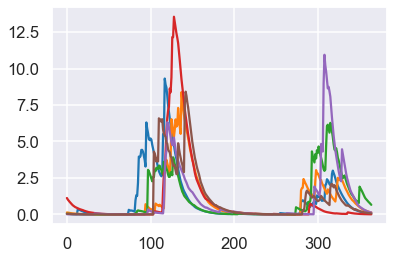

In [127]:
for y,sdf in df_with_norm.groupby("year"):
    plt.plot(sdf["day_of_year"], sdf["gambiae_norm"])

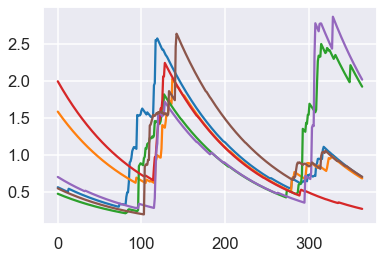

In [128]:
for y,sdf in df_with_norm.groupby("year"):
    plt.plot(sdf["day_of_year"], sdf["funest_norm"])

In [129]:
m = df_with_norm.groupby("month").agg("mean").reset_index()

(0.0, 1.0)

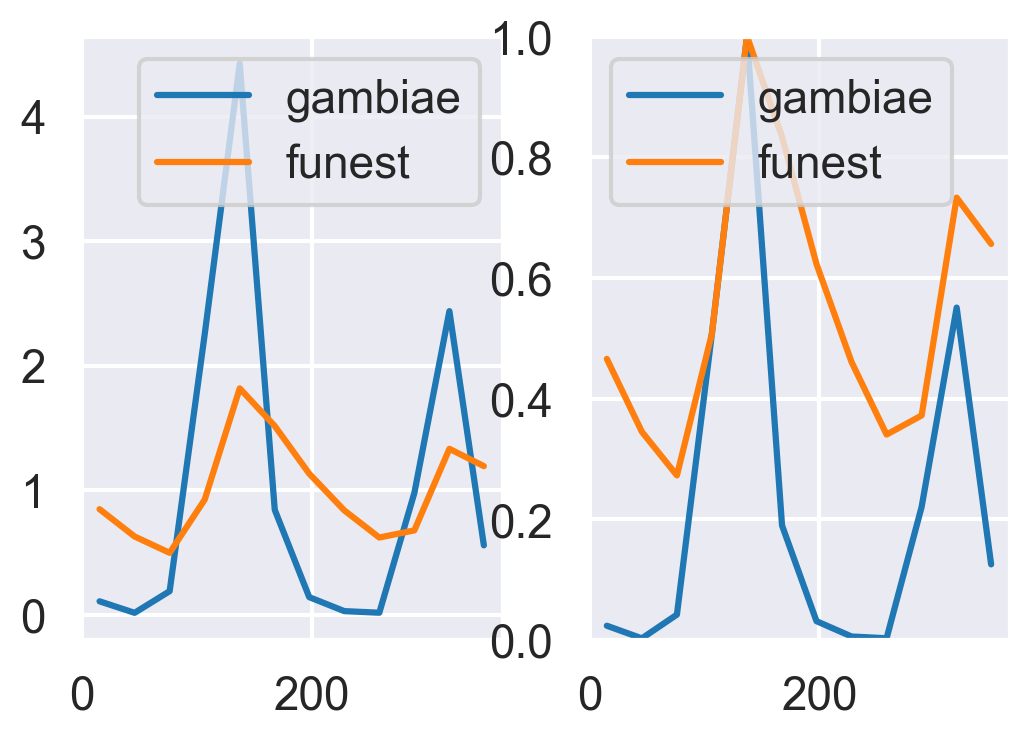

In [130]:
plt.figure(dpi=200)
plt.subplot(121)
plt.plot(m["day_of_year"], m["gambiae_norm"], label="gambiae")
plt.plot(m["day_of_year"], m["funest_norm"], label="funest")
plt.legend()

plt.subplot(122)
plt.plot(m["day_of_year"], m["gambiae_norm"]/np.max(m["gambiae_norm"]), label="gambiae")
plt.plot(m["day_of_year"], m["funest_norm"]/np.max(m["funest_norm"]), label="funest")
plt.legend()
plt.ylim([0,1])

In [110]:
g_spline = m["gambiae_norm"]/np.max(m["gambiae_norm"])
f_spline = m["funest_norm"]/np.max(m["funest_norm"])

In [ ]:
# LEFT OFF HERE 4pm 4/29

In [111]:
# Set relative factor between funest and gambiae to get overall 75% funest, 12.5% gambiae, 12.5% arab:
relative_factor = 0.125/(np.sum(g_spline)/(np.sum(f_spline)+np.sum(g_spline)))
print(relative_factor)

0.07047123884274835


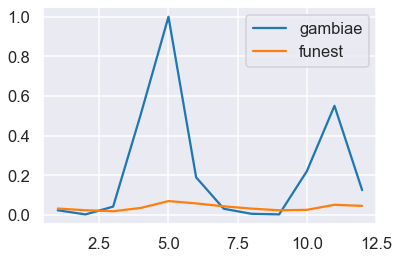

In [112]:
plt.plot(m["month"], g_spline, label="gambiae")
plt.plot(m["month"], f_spline*relative_factor, label="funest")
plt.legend()

In [113]:
save_df = pd.DataFrame({
    "archetype": "Eastern",
    "gambiae_spline": np.array(g_spline),
    "funest_spline": np.array(f_spline),
    "times": month_times_for_dtk
})

In [114]:
save_df

,archetype,gambiae_spline,funest_spline,times
0,Central,0.024072,0.465909,0.000
1,Central,0.003177,0.345198,30.417
2,Central,0.042474,0.272972,60.833
3,Central,0.508539,0.508156,91.250
4,Central,1.000000,1.000000,121.667
5,Central,0.190103,0.833583,152.083
6,Central,0.031632,0.622924,182.500
7,Central,0.006273,0.460727,212.917
8,Central,0.003341,0.340572,243.333
9,Central,0.220774,0.372226,273.750


In [88]:
save_df.to_csv("central_ento_splines.csv", index=False)

In [91]:
list(np.round(save_df["gambiae_spline"],2))

[0.51, 0.42, 0.52, 0.66, 0.86, 0.92, 0.82, 0.75, 0.84, 0.99, 1.0, 0.77]

In [92]:
list(np.round(save_df["funest_spline"],2))

[0.87, 0.82, 0.85, 0.9, 0.95, 0.93, 0.89, 0.87, 0.87, 0.94, 1.0, 0.97]

In [96]:
np.log10(relative_factor)

-1.0379345226595817

# Exploratory plots

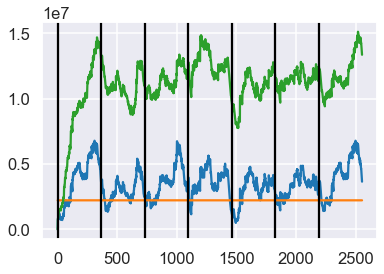

In [17]:
plt.plot(tr)
plt.plot(c)
plt.plot(wv)
for i in np.arange(7):
    plt.axvline(i*365, color='black')

In [42]:
df = pd.DataFrame({
    "year": np.repeat(np.arange(6),365),
    "time": np.arange(2555-365),
    "gambiae": tr[365:],
    "funest": wv[365:]
})

df["day_of_year"] = df["time"]%365
df["month"] = pd.cut(df["day_of_year"], bins=month_times, labels=np.arange(1,13))

In [47]:
m = df.groupby("month").agg("mean").reset_index()

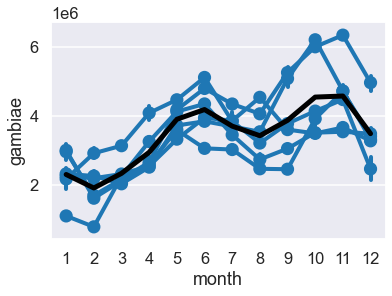

In [57]:
for y,sdf in df.groupby("year"):
    sns.pointplot(x=sdf["month"], y=sdf["gambiae"])
plt.plot(np.array(m["month"])-1, m["gambiae"], color='black', lw=5)

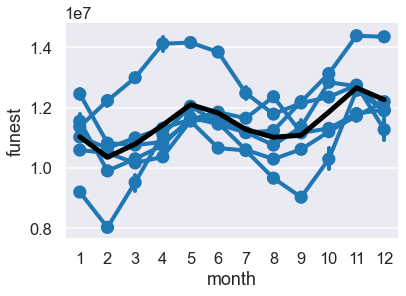

In [58]:
for y,sdf in df.groupby("year"):
    sns.pointplot(x=sdf["month"], y=sdf["funest"])
plt.plot(np.array(m["month"])-1, m["funest"], color='black', lw=5)

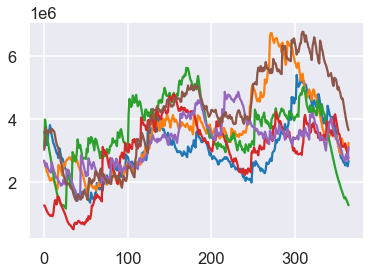

In [59]:
for y,sdf in df.groupby("year"):
    plt.plot(sdf["time"]%365, sdf["gambiae"])

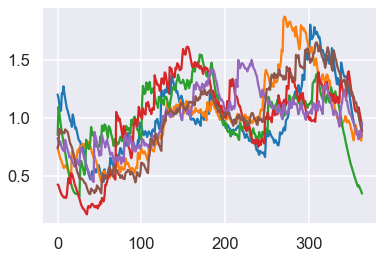

In [60]:
for y,sdf in df.groupby("year"):
    plt.plot(sdf["time"]%365, sdf["gambiae"]/np.mean(sdf["gambiae"]))

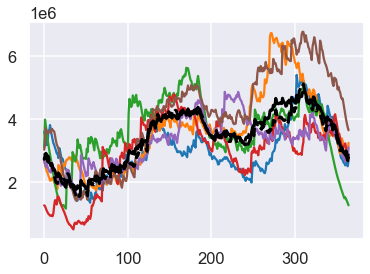

In [21]:
a = df.groupby("day_of_year").agg("mean").reset_index()
b = df.groupby("day_of_year").agg("median").reset_index()

for y,sdf in df.groupby("year"):
    plt.plot(sdf["time"]%365, sdf["gambiae"])
plt.plot(a["day_of_year"], a["gambiae"], color='black', lw=3)
plt.plot(b["day_of_year"], b["gambiae"], color='black', lw=3, linestyle='dashed')

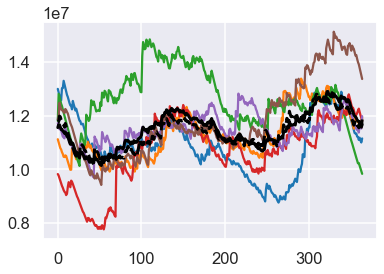

In [22]:
a = df.groupby("day_of_year").agg("mean").reset_index()
b = df.groupby("day_of_year").agg("median").reset_index()

for y,sdf in df.groupby("year"):
    plt.plot(sdf["time"]%365, sdf["funest"])
plt.plot(a["day_of_year"], a["funest"], color='black', lw=3)
plt.plot(b["day_of_year"], b["funest"], color='black', lw=3, linestyle='dashed')

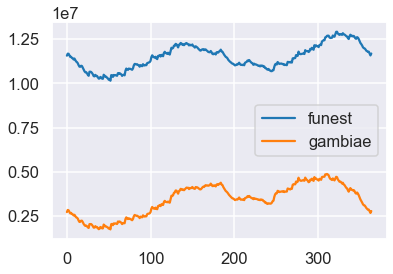

In [23]:
a = df.groupby("day_of_year").agg("mean").reset_index()
plt.plot(a["day_of_year"], a["funest"], label="funest")
plt.plot(a["day_of_year"], a["gambiae"], label="gambiae")
plt.legend()

In [24]:
f = a["funest"]/np.max(a["funest"])
g = a["gambiae"]/np.max(a["gambiae"])

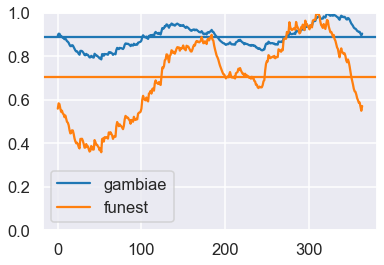

In [25]:
plt.plot(f, label="gambiae")
plt.axhline(np.mean(f))
plt.plot(g, label="funest")
plt.axhline(np.mean(g), color="C1")
plt.ylim([0,1])
plt.legend()

In [26]:
# We want total # of funestus to be ~5% of gambiae.

rescale_factor = 0.05/(np.sum(f)/np.sum(g))

print(rescale_factor)

0.03955340186576526


In [34]:
bins = month_times
labels = np.arange(12)
foo = pd.cut(a['day_of_year'], bins=bins, labels=labels)

In [35]:
foo

0       0
1       0
2       0
3       0
4       0
       ..
360    11
361    11
362    11
363    11
364    11
Name: day_of_year, Length: 365, dtype: category
Categories (12, int64): [0 < 1 < 2 < 3 ... 8 < 9 < 10 < 11]

nan